In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.txt')
training_set = dataset_train.iloc[:,1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
dataset_train.shape

(2035, 8)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []
for i in range(60,2035):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

In [9]:
y_train.shape

(1975,)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

We add the LSTM layer and later add a few Dropout layers to prevent overfitting. We add the LSTM layer with the following arguments:

    50 units which is the dimensionality of the output space
    return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence
    input_shape as the shape of our training set.

When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped. Thereafter, we add the Dense layer that specifies the output of 1 unit. After this, we compile our model using the popular Adam optimizer and set the loss as the mean_squarred_error. This will compute the mean of the squared errors. Next, we fit the model to run on 100 epochs with a batch size of 32. Keep in mind that, depending on the specs of your computer, this might take a few minutes to finish running.

In [12]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train,y_train, epochs = 100, batch_size=32)

Epoch 1/100
62/62 [==============================] - 1s 17ms/step - loss: 0.0089
Epoch 2/100
62/62 [==============================] - 1s 17ms/step - loss: 0.0028
Epoch 3/100
62/62 [==============================] - 1s 16ms/step - loss: 0.0028
Epoch 4/100
62/62 [==============================] - 1s 16ms/step - loss: 0.0030
Epoch 5/100
62/62 [==============================] - 1s 17ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 1s 17ms/step - loss: 0.0024
Epoch 7/100
62/62 [==============================] - 1s 16ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 1s 16ms/step - loss: 0.0019
Epoch 9/100
62/62 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 10/100
62/62 [==============================] - 1s 16ms/step - loss: 0.0019
Epoch 11/100
62/62 [==============================] - 1s 16ms/step - loss: 0.0018
Epoch 12/100
62/62 [==============================] - 1s 16ms/step - loss: 0.0018
Epoch 13/100
62/62 [=====

In [14]:
dataset_test = pd.read_csv('drive/My Drive/tatatest.txt')
real_stock_price = dataset_test.iloc[:,1:2].values

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,76):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

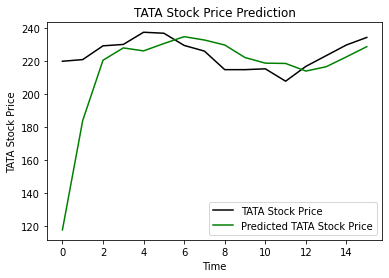

In [16]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()